# TASK

*Project focused on forecasting Apple Inc. (AAPL) stock prices for the next 30 days to aid investors, traders, and financial analysts in making buy/sell decisions.

*The project involves using a dataset with financial, economic, and sentiment-related variables that influence Apple's stock price.

*Load the data from "Apples_stock price dataset.xlsx", handle missing values and outliers, filter the data to include only observations within the specified trading hours (4:00 AM to 8:00 PM ET) and exclude weekends, and then build and explain the following models: ARIMA, SARIMA, VAR, Random Forest Regressor, XGBoost/LightGBM, LSTM, Prophet, and Hybrid Models.

# 1.Business Objective and Data Analysis
The core objective is to predict the Apple stock market price for the next 30 days to help market participants monitor stock prices and make informed buy/sell decisions.

# STEP-1 : Data Loading and Initial Preparation
Subtask:
Load the data from the provided Excel file into a pandas DataFrame.

**Reasoning**:
Import pandas and load the data from the Excel file into a DataFrame.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset (file_path)
df = pd.read_excel("Apples_stock price dataset.xlsx")

In [2]:
print("Initial Data Head:")
df.head()

Initial Data Head:


,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


In [3]:
# Ensure the date column is set as the index and in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [4]:
print("\nInitial Data Info:")
df.info()


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2010-01-01 00:00:00 to 2021-05-29 15:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_price        99969 non-null  float64
 1   nasdaq_index       99993 non-null  float64
 2   sp500_index        99996 non-null  float64
 3   inflation_rate     99992 non-null  float64
 4   unemployment_rate  99996 non-null  float64
 5   interest_rate      99998 non-null  float64
 6   market_sentiment   99996 non-null  float64
dtypes: float64(7)
memory usage: 6.1 MB


In [5]:
df.shape

(100000, 7)

In [6]:
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,99969.000000,99993.000000,99996.000000,99992.000000,99996.000000,99998.000000,99996.000000
mean,299.991904,259114.622519,101463.085069,3.004255,4.996003,2.001474,0.003208
std,91.443363,144514.371806,57294.513880,1.152769,1.154703,0.864929,0.578063
min,9.537676,7984.160950,2981.778422,1.000002,3.000021,0.500135,-0.999990
25%,248.619582,134716.834762,51573.589744,2.005934,3.999036,1.254851,-0.498332
50%,300.071948,257861.008478,100923.141212,3.005833,4.990133,2.000173,0.004348
75%,351.442877,385205.578140,151634.820165,4.001412,5.994514,2.750588,0.504524
max,601.664858,507957.788157,200815.813093,4.999993,6.999958,3.499985,0.999986


# Step-1.1 : Handle missing values
Subtask:
Identify and fill missing values in the dataset using appropriate methods.

In [7]:
print("Missing values before filling:")
print(df.isnull().sum())

Missing values before filling:
stock_price          31
nasdaq_index          7
sp500_index           4
inflation_rate        8
unemployment_rate     4
interest_rate         2
market_sentiment      4
dtype: int64


# Step-2:Exploratory Data Analysis (EDA) and Data Cleaning

Subtask:
Generate visualizations for the processed DataFrame to understand the data distribution and relationships.

**Step-2.1 :**
Generate histograms for all numerical columns to visualize their distributions.

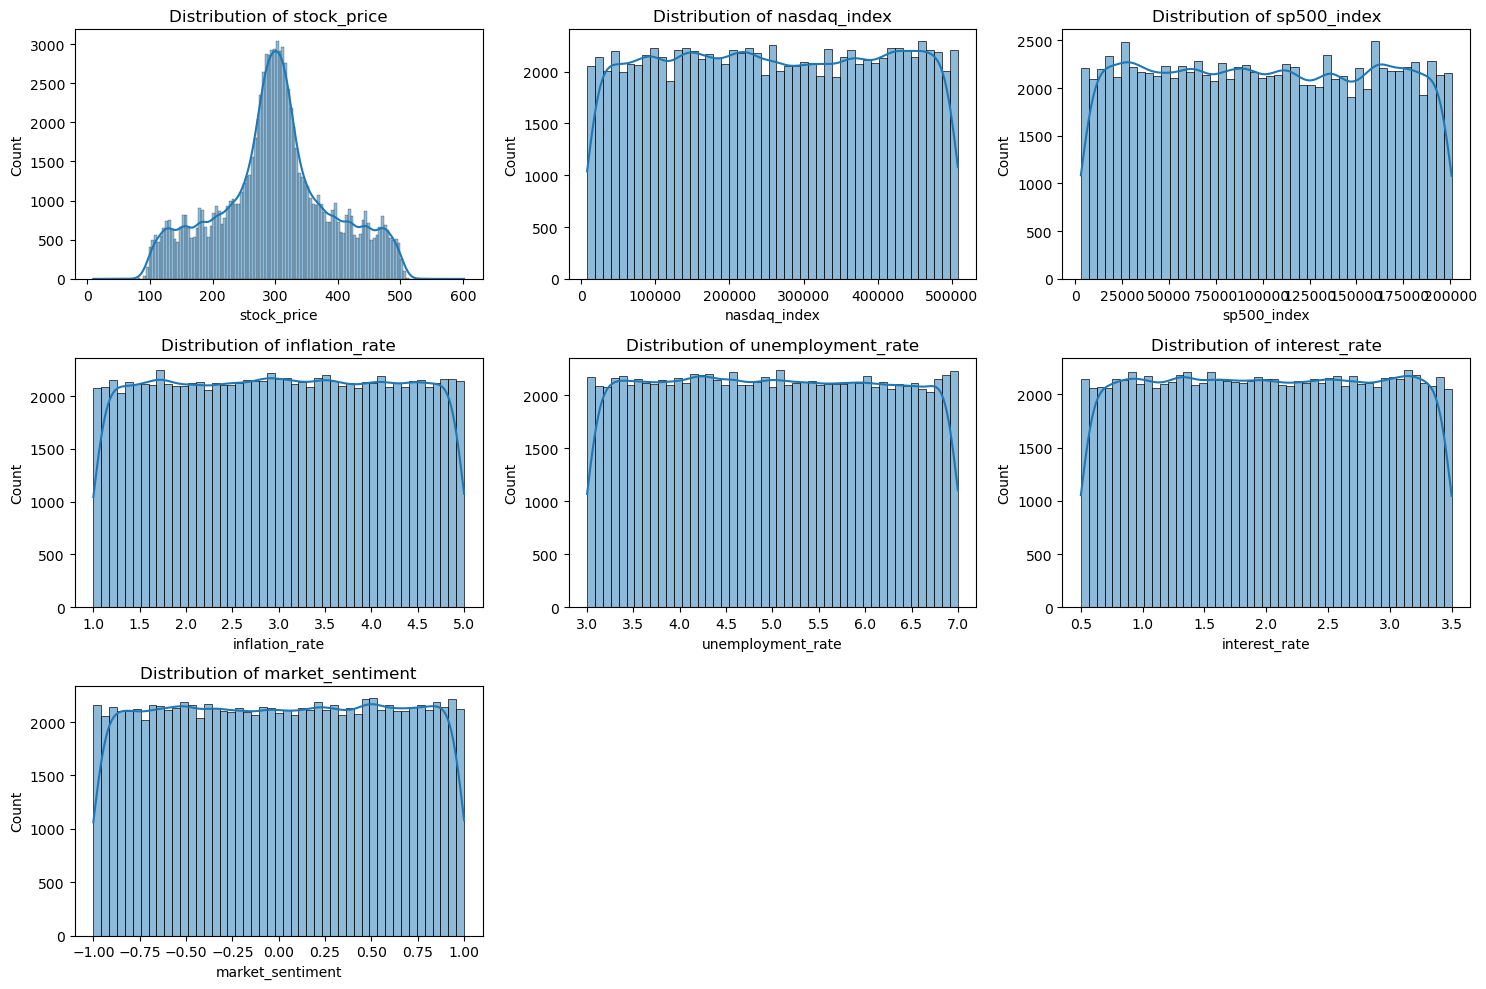

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['stock_price', 'nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Step-2.2:**
Generate scatter plots for 'stock_price' against other numerical columns to visualize relationships.

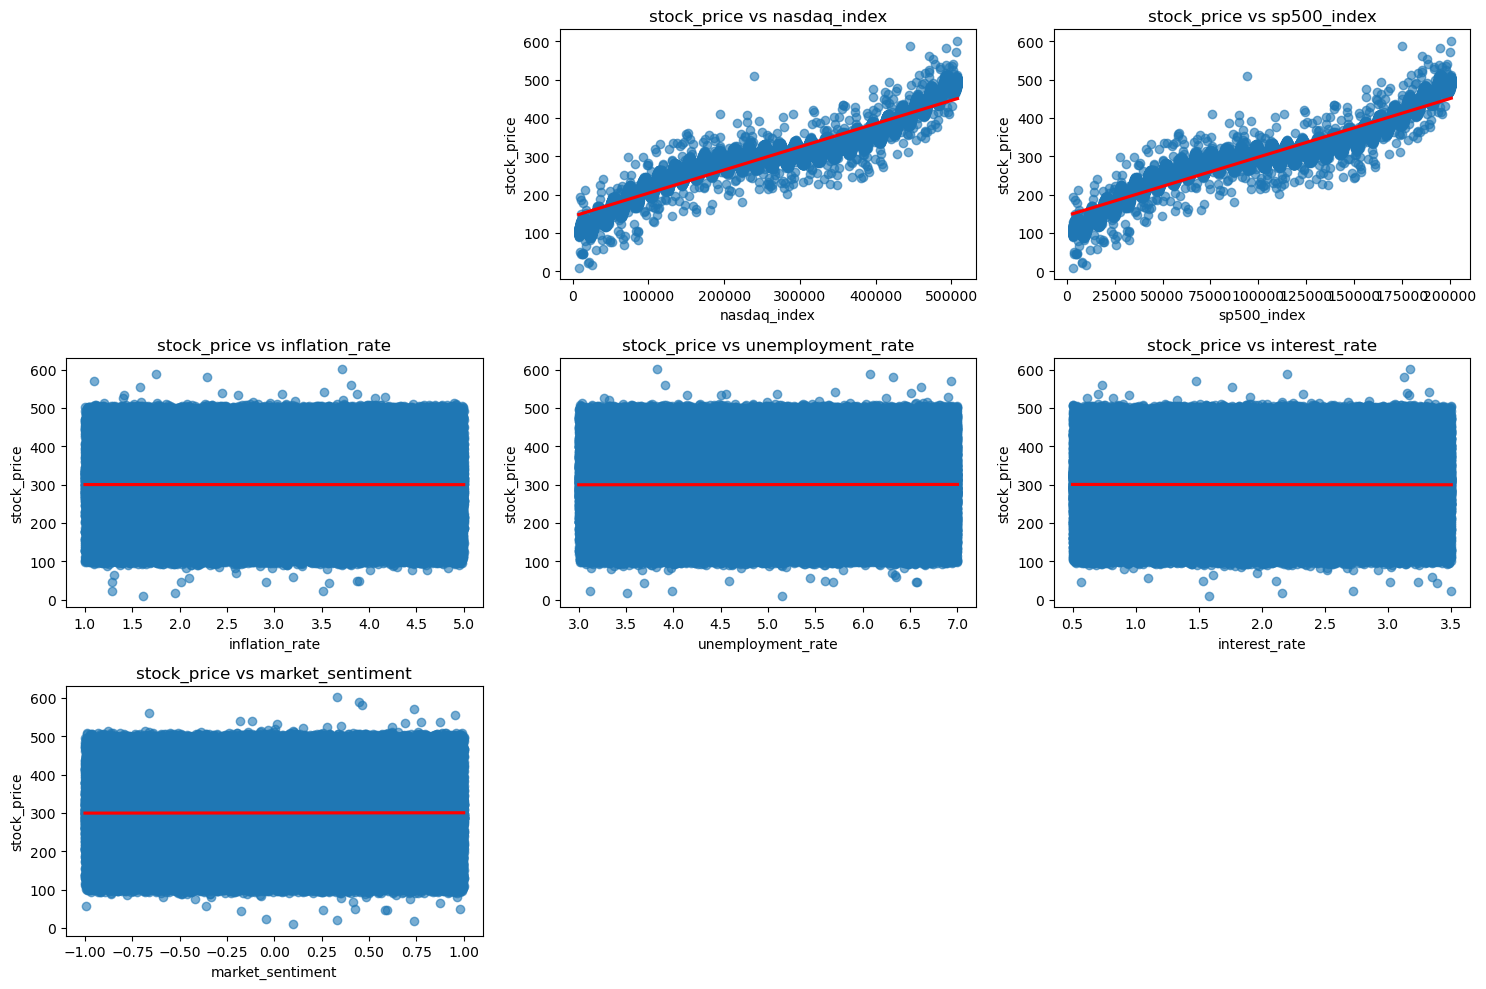

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col != 'stock_price':
        plt.subplot(3, 3, i + 1)
        # Use regplot instead of scatterplot to include regression line
        sns.regplot(
            x=df[col],
            y=df['stock_price'],
            scatter_kws={'alpha': 0.6},   # makes points slightly transparent
            line_kws={'color': 'red'},    # red regression line
            ci=None                       # disable confidence interval shading
        )
        plt.title(f'stock_price vs {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('stock_price')

plt.tight_layout()
plt.show()

**Step-2.3:**
 Generate a heatmap to visualize the correlation matrix of the numerical columns.

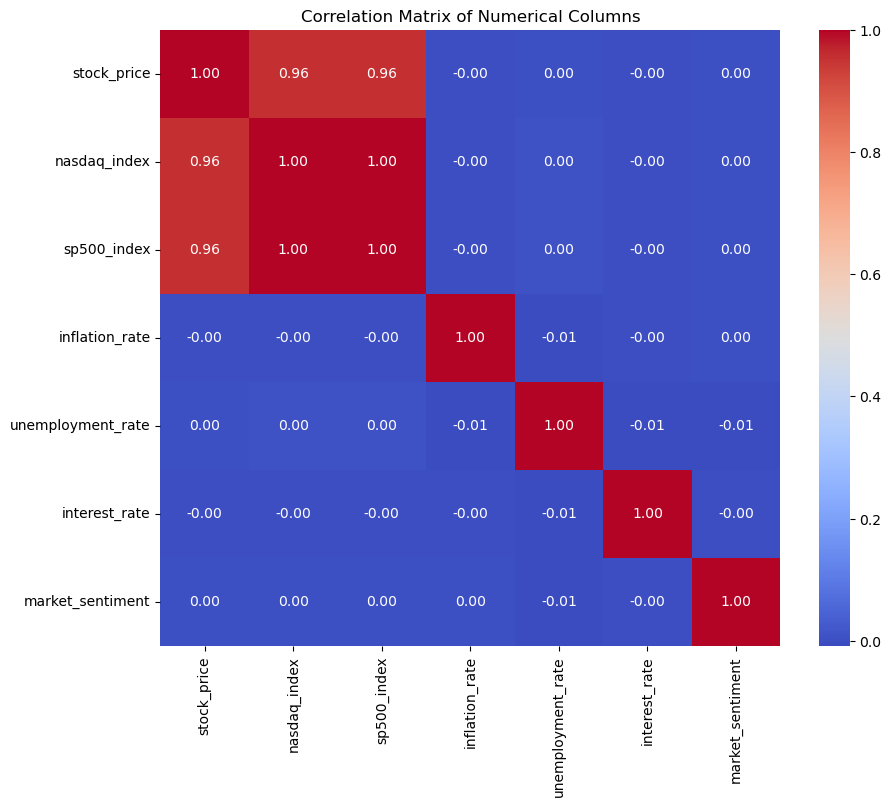

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Step-2.4:**
Before not remove the outliers to Generate box plots for all numerical columns to visualize potential outliers and distribution spread.

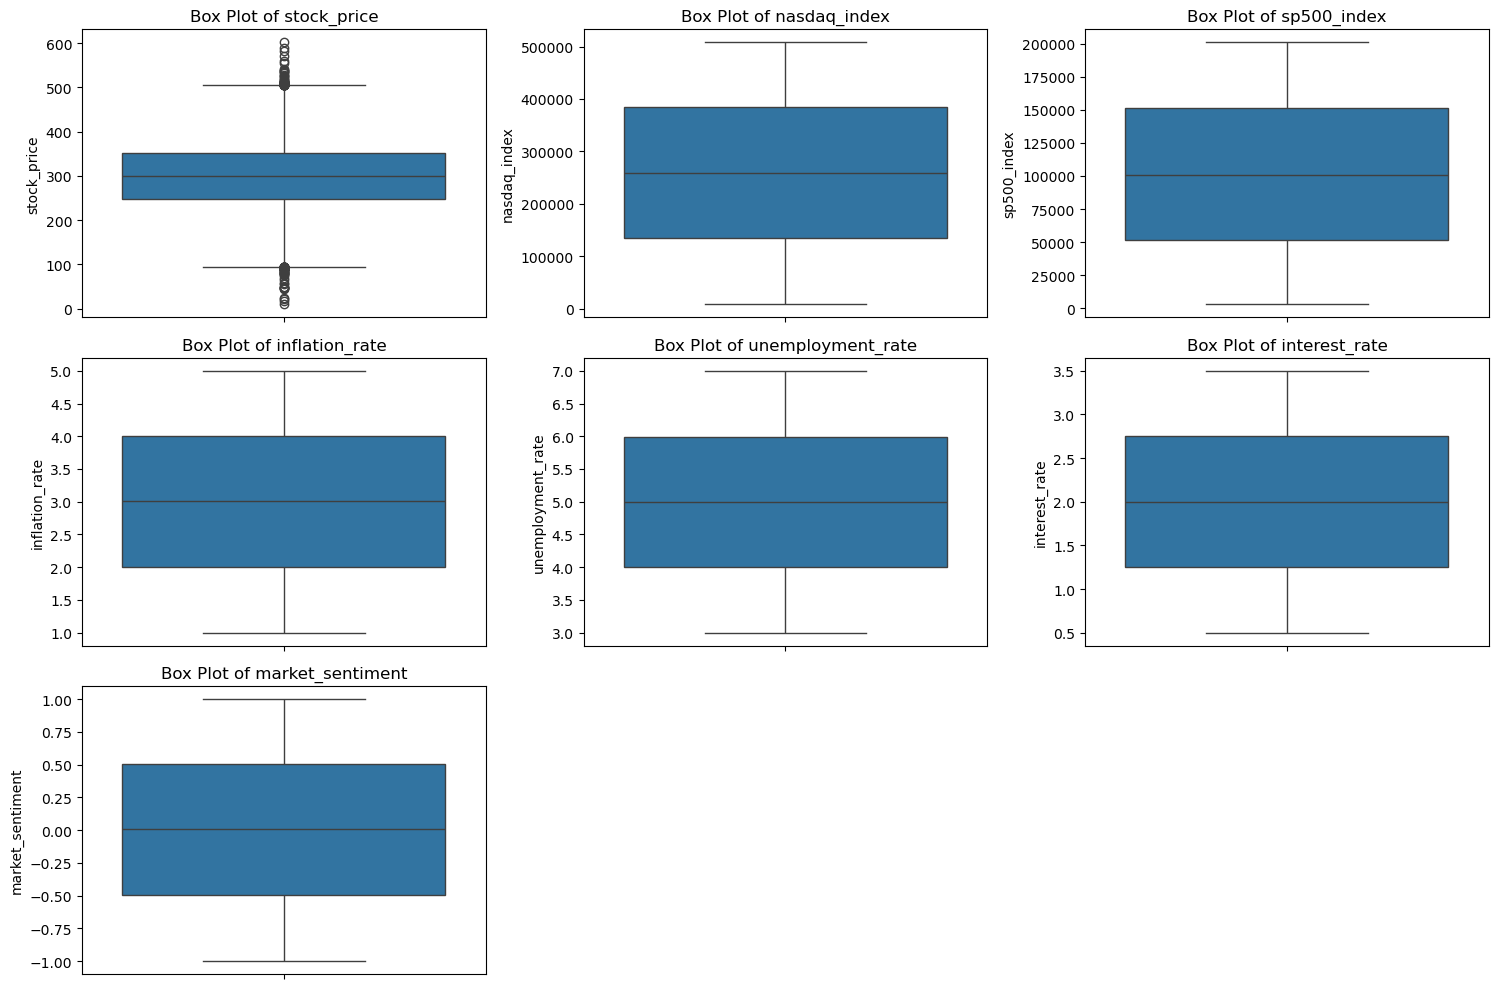

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Check for and fill missing values in the dataframe using Median.

In [12]:
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

In [13]:
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64


**Step-2.5:** Handle Outliers (Fill, Do Not Drop)

Outliers must be filled/capped, not dropped. A common method is the Interquartile Range (IQR) capping, which replaces extreme values with the boundaries

In [14]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

In [15]:
# Apply capping to all relevant numerical columns
numerical_cols = ['stock_price', 'nasdaq_index', 'sp500_index',
                  'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']

for col in numerical_cols:
    df = cap_outliers_iqr(df, col)

print("\nOutliers have been capped using IQR method.")
display(df.head())


Outliers have been capped using IQR method.


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


**Step-2.6:**
After remove the outliers to Generate box plots for all numerical columns to visualize.

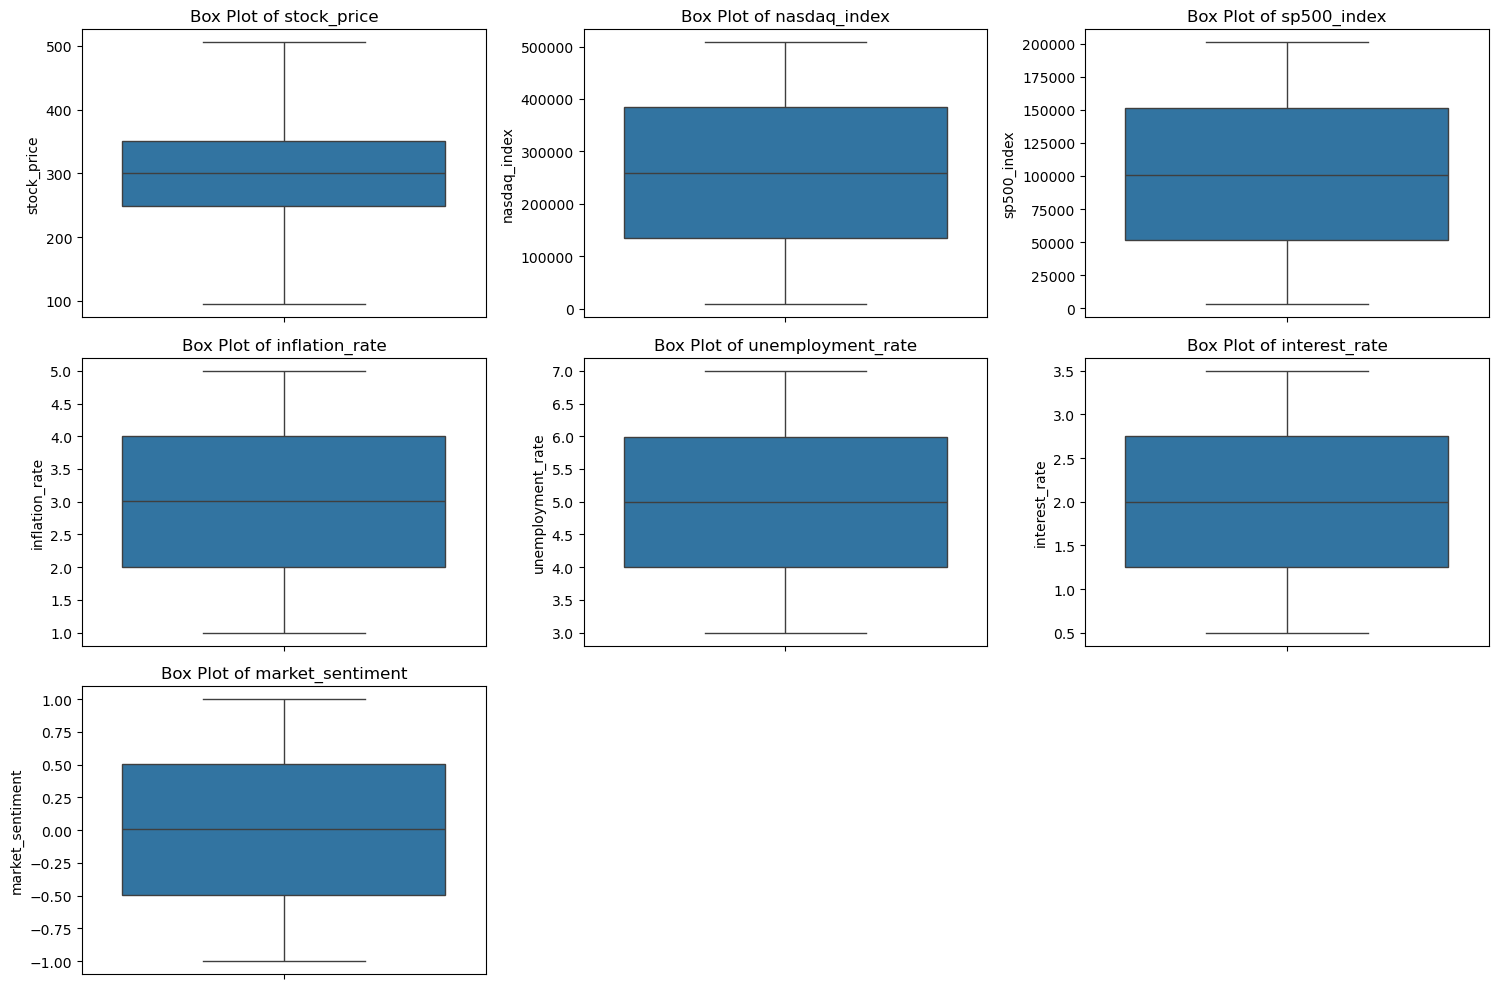

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Step-3:Filter data by trading hours

### Subtask:
Filter the data to include only observations within the specified trading hours (4:00 AM to 8:00 PM ET) and exclude weekends.

In [17]:
# Filter for specific hours (between 4 and 20)
df_filtered = df[(df.index.hour >= 4) & (df.index.hour <= 20)]

In [18]:
# Exclude weekends (Monday=0, Sunday=6 → keep only <5)
df_filtered = df_filtered[df_filtered.index.dayofweek < 5]

In [19]:
# Display the first few rows
display(df_filtered.head())

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119
2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849
2010-01-01 07:00:00,104.107075,8027.722289,3015.504909,4.056720,3.377880,3.276263,0.002849
2010-01-01 08:00:00,97.961085,8029.541811,3020.187389,2.099831,4.815785,1.761161,-0.634609


**Step-3.1: Explore data**

### Subtask:
Perform exploratory data analysis to understand the characteristics of the data, including visualizing the stock prices over time.


**Reasoning**:
Perform exploratory data analysis by printing descriptive statistics and data types, and then visualize the stock price over time.

In [20]:
print("Descriptive statistics of the filtered data:")
display(df_filtered.describe())

Descriptive statistics of the filtered data:


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000
mean,300.049856,259173.047014,101487.366562,3.008912,4.997872,2.000613,0.001613
std,91.390832,144498.560423,57288.636715,1.151869,1.154274,0.867870,0.577064
min,94.472617,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.706934,134779.056802,51585.322849,2.008314,3.998148,1.252027,-0.501901
50%,300.071948,257948.506296,100964.218397,3.008793,4.995658,1.997309,0.003999
75%,351.461555,385272.850702,151663.681145,4.007039,5.995553,2.756850,0.501860
max,505.570789,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


In [21]:
print("\nData types of the filtered data:")
display(df_filtered.info())


Data types of the filtered data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50592 entries, 2010-01-01 04:00:00 to 2021-05-28 20:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_price        50592 non-null  float64
 1   nasdaq_index       50592 non-null  float64
 2   sp500_index        50592 non-null  float64
 3   inflation_rate     50592 non-null  float64
 4   unemployment_rate  50592 non-null  float64
 5   interest_rate      50592 non-null  float64
 6   market_sentiment   50592 non-null  float64
dtypes: float64(7)
memory usage: 3.1 MB


None

In [22]:
df_filtered.shape

(50592, 7)

**Step-3.2:Decomposition-**

You’re using the seasonal_decompose() function from the statsmodels library.
It performs time series decomposition using a moving average approach for trend, sesaonality , residual for stock_price column.Assuming hourly data, we can try period = 24 (daily seasonality)

* Trend – the long-term movement of prices (upward or downward)

* Seasonality – repeating patterns that occur at regular intervals (e.g., daily)

* Residual (Noise) – random variation that’s not explained by trend or seasonality

In [23]:
df_filtered['stock_price'].isna().sum()#Check for missing values

np.int64(0)

In [24]:
df_filtered['stock_price'] = df_filtered['stock_price'].interpolate(method='linear') #Fill or interpolate missing values

In [25]:
df_filtered.shape

(50592, 7)

In [26]:
df.head()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose   #Importing required function

**Reason:** What happens here:

 df_filtered['stock_price'] → The time series you want to decompose.

 model='additive' → Assumes the data can be represented as:

 Stock Price=Trend+Seasonal+Residual

 (You can use "multiplicative" if your data changes proportionally over time.)

 period=24 → Because your data is hourly, and there are 24 hours in a day, this captures daily seasonality.

 So, this line mathematically decomposes the stock price into 3 parts.

In [28]:
# Performing decomposition
decomposition = seasonal_decompose(df_filtered['stock_price'], model='additive', period=24)

In [29]:
# Extracting components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

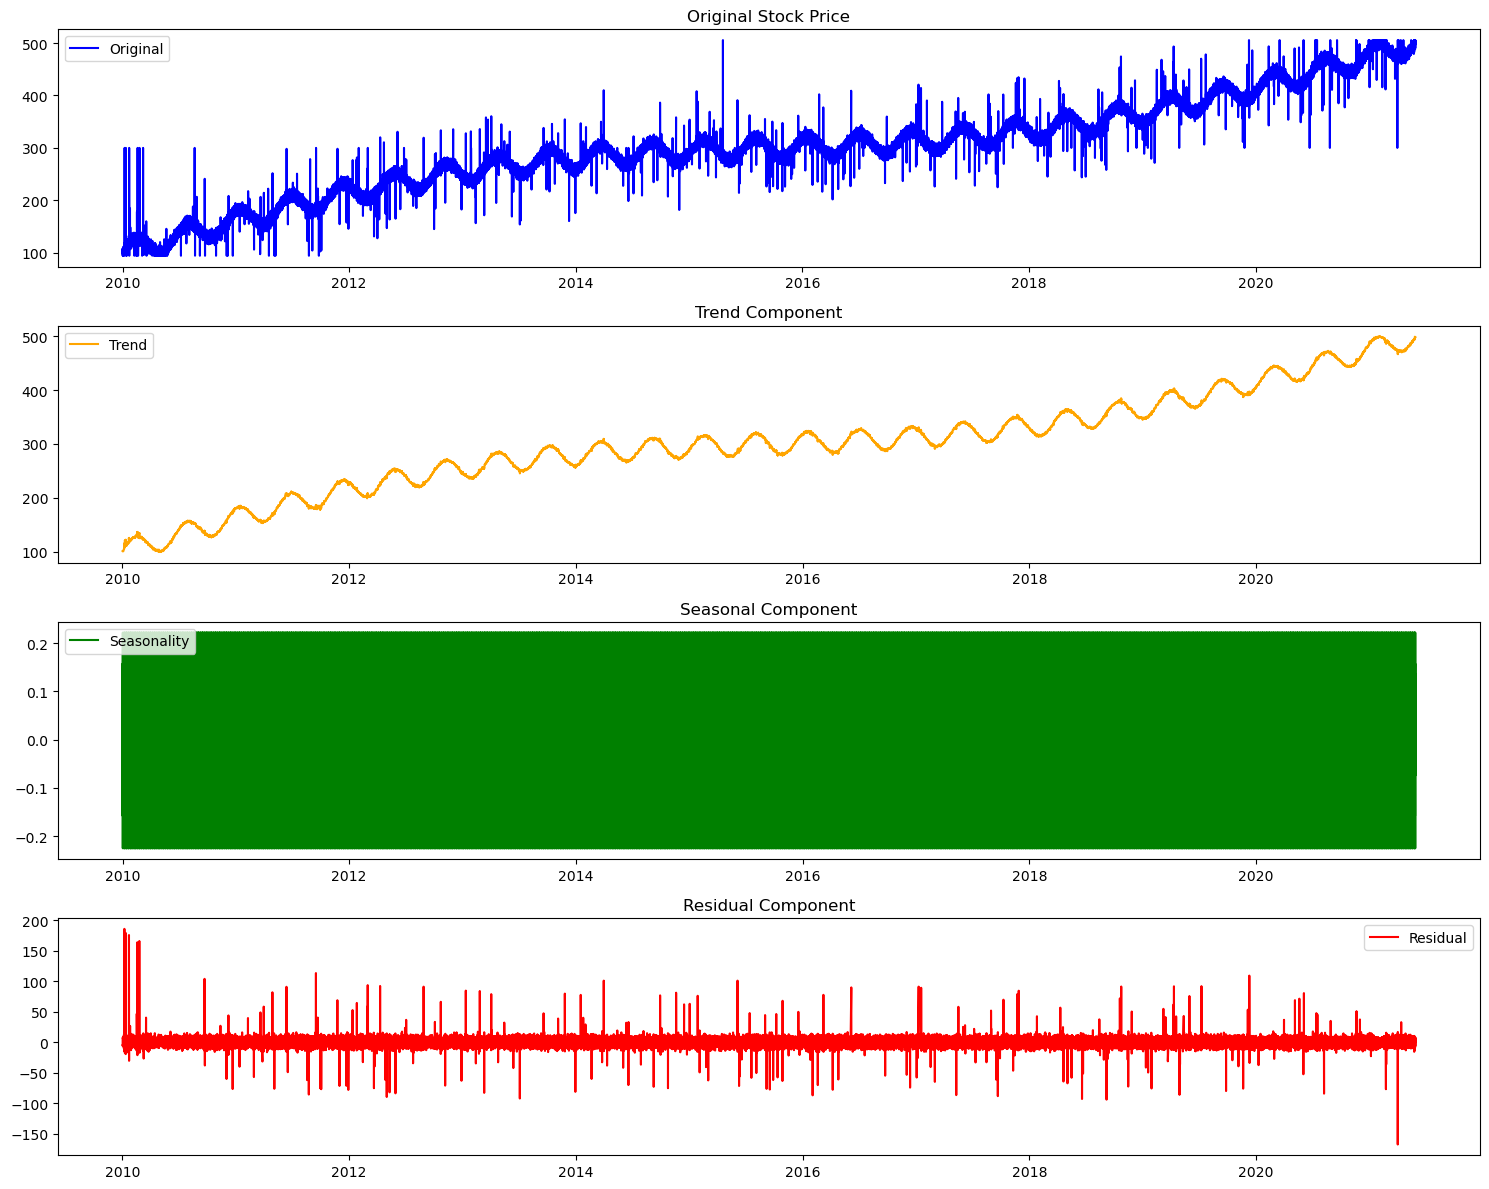

In [30]:
# Plotting each component
plt.figure(figsize=(15,12))  #Creates a large 15x12 inch figure to fit all 4 plots neatly.
plt.subplot(4,1,1)
plt.plot(df['stock_price'], label='Original', color='blue')  #Plots the original stock price in blue.
plt.title('Original Stock Price')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')     #Plots the trend (orange line).
plt.title('Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')   # Plots the daily repeating seasonal pattern (green line).
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residual, label='Residual', color='red')         # Plots the residual (noise) (red line).
plt.title('Residual Component')
plt.legend()

plt.tight_layout()  # Finally, Ensures the plots don’t overlap and displays the figure.
plt.show()

# Step-4:Prepare data for modeling

Prepare the data for the different models, which may involve creating new features, transforming existing ones, or splitting the data into training and testing sets.

In [46]:
# Prepare data for time series modeling
stock_price_series = df_filtered['stock_price']

print("\nStock Price Time Series:")
display(stock_price_series.head())


Stock Price Time Series:


timestamp
2010-01-01 04:00:00     98.983464
2010-01-01 05:00:00     99.022103
2010-01-01 06:00:00    108.127409
2010-01-01 07:00:00    104.107075
2010-01-01 08:00:00     97.961085
Name: stock_price, dtype: float64

**Reasoning:**:we checking the autocorrelation plot for the stock price.

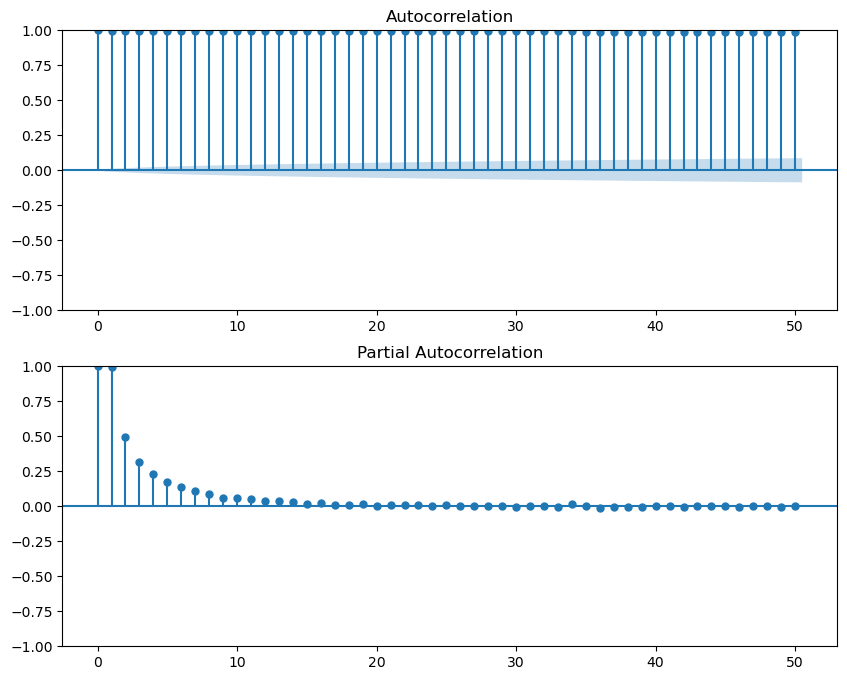

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to help determine ARIMA parameters
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(stock_price_series, ax=axes[0], lags=50)
plot_pacf(stock_price_series, ax=axes[1], lags=50)
plt.show()

# **Step-4.1:** Building the ARIMA MODEl for our filtered dataset

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [49]:
# Fit an MA Model with lag1:
model = ARIMA(df_filtered['stock_price'], order=(1, 1, 1))
model_fitted = model.fit()
model_fitted.summary()
rmse=np.sqrt(np.mean((model_fitted.resid)**2))
print("RMSE:", np.round(rmse,3))

# Fit an MA Model with lag2:
model = ARIMA(df_filtered['stock_price'], order=(1, 1, 3))
model_fitted = model.fit()
model_fitted.summary()
rmse=np.sqrt(np.mean((model_fitted.resid)**2))
print("RMSE:", np.round(rmse,3))

# Fit an MA Model with lag3:
model = ARIMA(df_filtered['stock_price'], order=(5, 1, 5))
model_fitted = model.fit()
model_fitted.summary()
rmse=np.sqrt(np.mean((model_fitted.resid)**2))
print("RMSE:", np.round(rmse,3))

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 6.853


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 6.853


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 6.852


In [41]:
# Forecast the next 30  with ARIMA
arima_forecast = model_fitted.forecast(steps=30)

print("\nARIMA Forecast for the next 30 days:")
display(arima_forecast)


ARIMA Forecast for the next 30 days:


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


50592    498.359676
50593    498.330012
50594    498.442712
50595    498.376036
50596    498.414947
50597    498.447201
50598    498.338546
50599    498.437756
50600    498.392919
50601    498.397800
50602    498.443574
50603    498.350624
50604    498.429805
50605    498.404571
50606    498.387105
50607    498.439577
50608    498.362781
50609    498.420993
50610    498.412383
50611    498.381537
50612    498.434909
50613    498.373990
50614    498.412703
50615    498.417252
50616    498.379763
50617    498.429692
50618    498.383743
50619    498.405718
50620    498.419823
50621    498.380603
Name: predicted_mean, dtype: float64

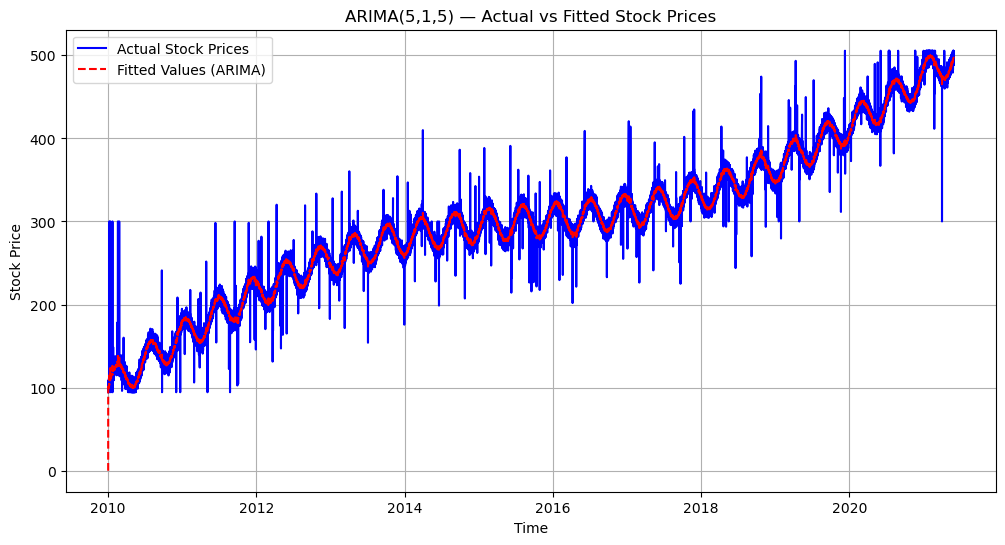

In [59]:
# --- Plot 1: Actual vs Fitted ---
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['stock_price'], label='Actual Stock Prices', color='blue')
plt.plot(model_fitted.fittedvalues, label='Fitted Values (ARIMA)', color='red', linestyle='--')
plt.title('ARIMA(5,1,5) — Actual vs Fitted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Forecast next 30 Stock Prices
forecast_steps = 30
forecast = model_fitted.get_forecast(steps=forecast_steps)

# Get predicted means and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Prepare output as DataFrame
forecast_df = pd.DataFrame({
    'forecasted_price': np.round(forecast_mean, 3),
    'lower_ci': np.round(forecast_ci.iloc[:, 0], 3),
    'upper_ci': np.round(forecast_ci.iloc[:, 1], 3)
})

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
print("\nARIMA model Stock Price Time Series next 30  forcecast prices:")
display(forecast_df.head(30))


ARIMA model Stock Price Time Series next 30  forcecast prices:


,forecasted_price,lower_ci,upper_ci
50592,498.360,484.958,511.762
50593,498.330,484.914,511.746
50594,498.443,485.007,511.879
50595,498.376,484.920,511.833
50596,498.415,484.937,511.893
50597,498.447,484.950,511.945
50598,498.339,484.817,511.860
50599,498.438,484.896,511.979
50600,498.393,484.831,511.954
50601,498.398,484.814,511.981


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


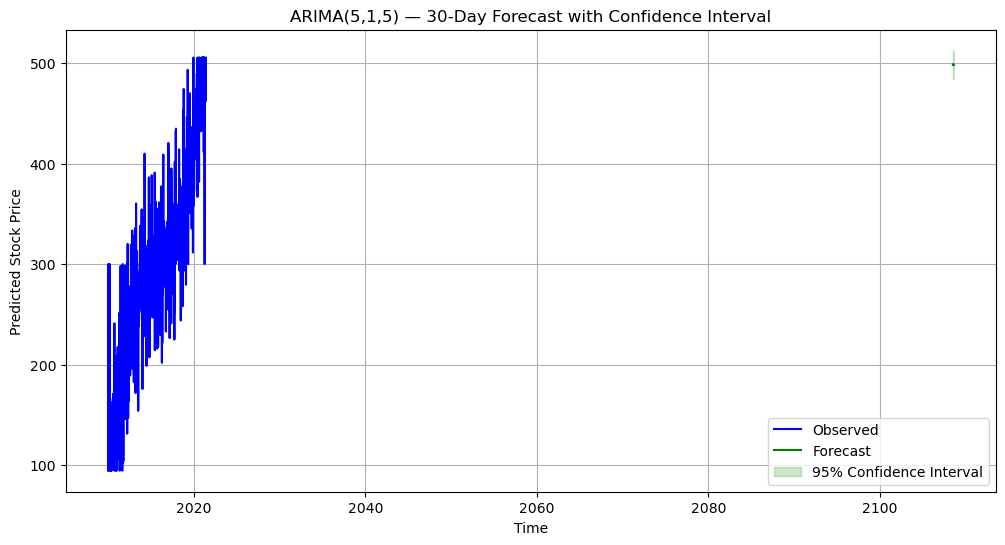

In [61]:
forecast_result = model_fitted.get_forecast(steps=30)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df_filtered['stock_price'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA(5,1,5) — 30-Day Forecast with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# **Step-4.2:** Building the SARIMA MODEL for filtered data.

**Reasoning:**

SARIMAX → A powerful model from statsmodels used for time series forecasting, especially when data shows both trend and seasonality.

“SARIMA” stands for Seasonal AutoRegressive Integrated Moving Average.

The extra “X” in SARIMAX means it can also include exogenous variables (other influencing features), though you’re not using them here.

A function from scikit-learn that measures how far off your predictions are from actual values.

In [52]:
print("Total data points before fitting:", len(stock_price_series))
print("Missing values:", stock_price_series.isna().sum())

Total data points before fitting: 50592
Missing values: 0


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
# Replace (1, 1, 1) with non-seasonal parameters and (1, 1, 1, 12) with seasonal parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12) # Assuming a seasonality of 12; adjust based on your data
sarima_model = SARIMAX(stock_price_series, order=sarima_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Print the model summary
print(sarima_results.summary())

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        stock_price   No. Observations:                50592
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -169052.432
Date:                            Sun, 19 Oct 2025   AIC                         338114.864
Time:                                    11:45:05   BIC                         338159.020
Sample:                                         0   HQIC                        338128.688
                                          - 50592                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0106      0.004     -2.394      0.017      -0.019      -0.002
ma.L1         -0.9436      0.002   

In [54]:
# --- Calculate and print MSE and RMSE ---

# Get the predicted values (in-sample predictions)
# These are the one-step ahead forecasts on the training data.
predictions = sarima_results.fittedvalues

# The first value(s) can be different due to model initialization, so we align them.
# It's good practice to drop the first few observations where the model is still stabilizing.
# For simplicity here, we'll use from the second observation onwards if needed.
# However, aligning by index is the most robust method.
valid_original = stock_price_series[predictions.index]

# Calculate Mean Squared Error (MSE)
# MSE is the average of the squared differences between the predicted and actual values.
mse = mean_squared_error(valid_original, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE, providing an error metric in the same units as the data.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 47.3414
Root Mean Squared Error (RMSE): 6.8805


In [55]:
# Forecast the next 30 days with SARIMA
sarima_forecast = sarima_results.forecast(steps=30)

print("\nSARIMA Forecast for the next 30:")
display(sarima_forecast)


SARIMA Forecast for the next 30:


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


50592    498.467636
50593    498.430751
50594    498.405650
50595    498.728992
50596    498.443629
50597    498.586412
50598    498.596419
50599    498.750456
50600    498.571254
50601    498.656220
50602    498.577928
50603    498.589601
50604    498.614754
50605    498.525727
50606    498.489604
50607    498.827236
50608    498.547946
50609    498.681085
50610    498.695983
50611    498.820877
50612    498.672194
50613    498.737234
50614    498.685529
50615    498.696104
50616    498.708980
50617    498.620070
50618    498.583972
50619    498.921571
50620    498.642267
50621    498.775429
Name: predicted_mean, dtype: float64

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


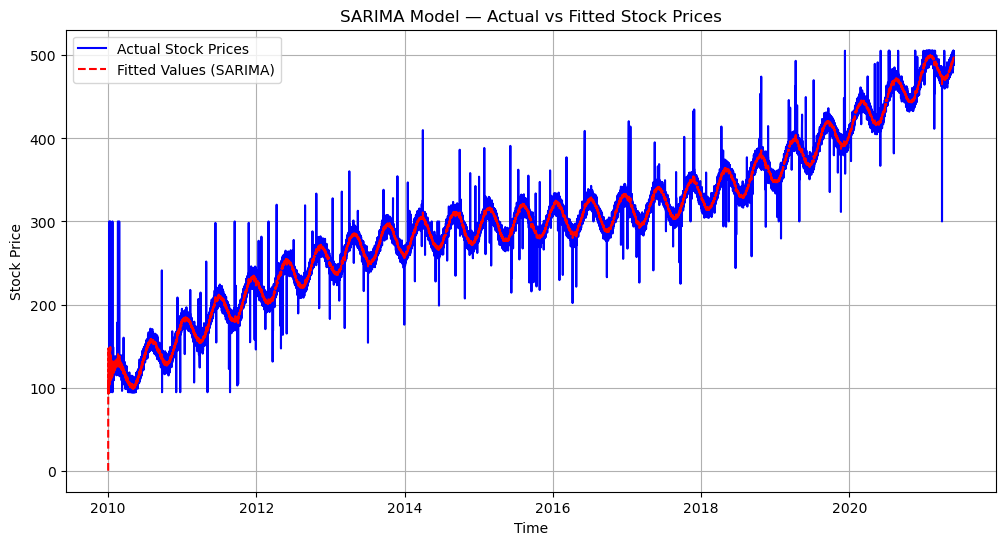

In [56]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Fit the SARIMA model ---
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # adjust if your data has different seasonality

sarima_model = SARIMAX(stock_price_series, order=sarima_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# --- Generate fitted values ---
fitted_values = sarima_results.fittedvalues

# --- Plot actual vs fitted values ---
plt.figure(figsize=(12, 6))
plt.plot(stock_price_series, label='Actual Stock Prices', color='blue')
plt.plot(fitted_values, label='Fitted Values (SARIMA)', color='red', linestyle='--')
plt.title('SARIMA Model — Actual vs Fitted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Step-4.1:** Building the VAR(Vector AutoRegression) MODEL for filtered data.

**Reasoning:** Import the VAR class, instantiate and fit the model, make predictions, extract stock price predictions, calculate MSE and RMSE, and print the results.

In [65]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# --- Use your data with at least two related columns ---
# Example: stock_price and volume (replace with your actual column names)
df_var = df_filtered[['stock_price','nasdaq_index', 'sp500_index']].dropna()

# --- Difference the data to make it stationary ---
df_var_diff = df_var.diff().dropna()

# --- Train/Test Split ---
n_obs = 30  # forecast next 30
train = df_var_diff[:-n_obs]
test = df_var_diff[-n_obs:]

# --- Fit VAR model ---
model = VAR(train)
results = model.fit(ic='aic')  # automatically chooses best lag order
print(results.summary())

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Oct, 2025
Time:                     12:29:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    31.2599
Nobs:                     50504.0    HQIC:                   31.1979
Log likelihood:      -1.00157e+06    FPE:                3.44208e+13
AIC:                      31.1697    Det(Omega_mle):     3.40715e+13
--------------------------------------------------------------------
Results for equation stock_price
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.145032         0.046081            3.147           0.002
L1.stock_price          -0.957402         0.004457         -214.796           0.000
L1.nasdaq_index          0.000008         

In [67]:
# --- Evaluate (only for stock_price) ---
actual = df_var.iloc[-n_obs:]['stock_price']
predicted = forecast_actual['stock_price']

# Mean Squared Error
mse = mean_squared_error(actual, predicted)

# Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"\nVAR MODEL MSE: {mse:.3f}")
print(f"VAR MODEL RMSE: {rmse:.3f}")


VAR MODEL MSE: 22.001
VAR MODEL RMSE: 4.691


In [77]:
# --- Display forecast with timestamps ---
print("\nNext 30 Forecasted Stock Prices (with timestamps):")
display(forecast_actual['stock_price'])


Next 30 Forecasted Stock Prices (with timestamps):


timestamp
2021-05-27 08:00:00    497.243255
2021-05-27 09:00:00    497.145365
2021-05-27 10:00:00    496.987250
2021-05-27 11:00:00    497.825598
2021-05-27 12:00:00    497.299392
2021-05-27 13:00:00    497.459192
2021-05-27 14:00:00    497.393297
2021-05-27 15:00:00    497.380161
2021-05-27 16:00:00    497.379809
2021-05-27 17:00:00    497.771818
2021-05-27 18:00:00    497.791544
2021-05-27 19:00:00    497.575048
2021-05-27 20:00:00    497.835957
2021-05-28 04:00:00    497.660352
2021-05-28 05:00:00    498.044623
2021-05-28 06:00:00    498.148213
2021-05-28 07:00:00    498.246430
2021-05-28 08:00:00    497.833686
2021-05-28 09:00:00    498.048707
2021-05-28 10:00:00    498.035747
2021-05-28 11:00:00    498.176623
2021-05-28 12:00:00    498.413277
2021-05-28 13:00:00    498.086868
2021-05-28 14:00:00    498.118494
2021-05-28 15:00:00    498.196857
2021-05-28 16:00:00    498.254654
2021-05-28 17:00:00    498.324159
2021-05-28 18:00:00    498.347464
2021-05-28 19:00:00    498.480987
2021

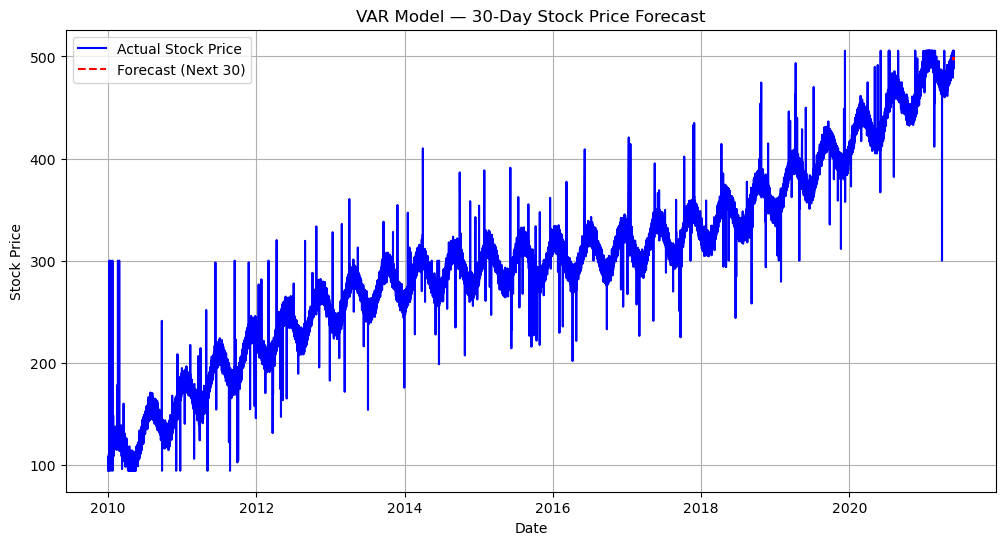

In [76]:
# --- Plot Actual vs Forecast ---
plt.figure(figsize=(12, 6))
plt.plot(df_var['stock_price'], label='Actual Stock Price', color='blue')
plt.plot(forecast_actual.index, forecast_actual['stock_price'], label='Forecast (Next 30)', color='red', linestyle='--')
plt.title('VAR Model — 30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- Prepare the data ---
df_rf = df_filtered[['stock_price']].dropna()
df_rf.index = pd.to_datetime(df_rf.index)  # Ensure datetime index

# --- Create lag features ---
def create_lags(data, lags=10):
    df = data.copy()
    for i in range(1, lags + 1):
        df[f'lag_{i}'] = df['stock_price'].shift(i)
    df.dropna(inplace=True)
    return df

lags = 10
df_lagged = create_lags(df_rf, lags)

In [80]:
# --- Train/Test Split ---
n_obs = 30  # Forecast horizon
train = df_lagged[:-n_obs]
test = df_lagged[-n_obs:]

X_train, y_train = train.drop('stock_price', axis=1), train['stock_price']
X_test, y_test = test.drop('stock_price', axis=1), test['stock_price']

In [81]:
# --- Train Random Forest ---
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [82]:
# --- Make predictions on the test set ---
y_pred = rf_model.predict(X_test)

# --- Calculate Errors ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

MSE: 24.961
RMSE: 4.996


In [83]:
# --- Forecast Next 30 Days (Iterative Prediction) ---
last_known = df_lagged.iloc[-1].drop('stock_price')

future_preds = []
for i in range(n_obs):
    pred = rf_model.predict([last_known])[0]
    future_preds.append(pred)

    # Shift the lag window
    last_known = pd.Series(
        [pred] + list(last_known.values[:-1]),
        index=last_known.index
    )

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: U

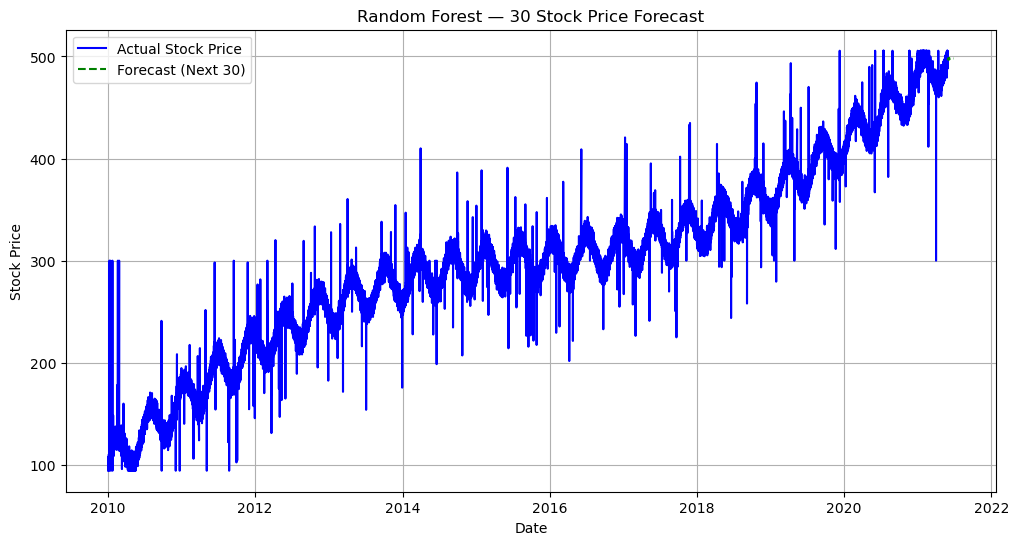

In [87]:
# --- Create Forecast DataFrame with Timestamps ---
last_date = df_rf.index[-1]
freq = pd.infer_freq(df_rf.index) or 'D'
forecast_index = pd.date_range(start=last_date, periods=n_obs + 1, freq=freq)[1:]

forecast_df = pd.DataFrame({'forecast_price': future_preds}, index=forecast_index)

# --- Plot Actual vs Forecast ---
plt.figure(figsize=(12, 6))
plt.plot(df_rf['stock_price'], label='Actual Stock Price', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast_price'], label='Forecast (Next 30)', color='green', linestyle='--')
plt.title('Random Forest — 30 Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# --- Display forecasted values ---
print("\nNext 30 Forecasted Stock Prices:")
display(forecast_df)


Next 30 Forecasted Stock Prices:


,forecast_price
2021-05-29 20:00:00,497.522304
2021-05-30 20:00:00,497.734935
2021-05-31 20:00:00,497.009969
2021-06-01 20:00:00,497.973180
2021-06-02 20:00:00,497.068062
2021-06-03 20:00:00,497.922669
2021-06-04 20:00:00,497.269856
2021-06-05 20:00:00,497.966373
2021-06-06 20:00:00,497.079822
2021-06-07 20:00:00,498.030904
